## Package Installation

In [5]:
!conda config --add channels bioconda
!conda install -y biopython muscle fasttree
!conda install --yes -c bioconda entrez-direct

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



## Data Acquisition

**Determining Species of Interest**:
used list of model organisms from https://en.wikipedia.org/wiki/List_of_model_organisms and chose three organisms under each subsection/section

In [ ]:
!for i in `cat _id.txt`; do esearch -db protein -query "$i" | efetch -format fasta > "$i".fasta; done

curl: (28) Operation timed out after 20000 milliseconds with 0 out of 0 bytes received
>78 ERROR: >78 curl command failed ( Thu Dec  9 17:07:35 PST 2021 ) with: 28>78
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi -d query_key=1&WebEnv=MCID_61b2a85614f2cd7033440349&retstart=0&retmax=1&db=protein&rettype=fasta&retmode=text&tool=edirect&edirect=16.2&edirect_os=Darwin&email=SamihaMahin%40Samihas-MacBook-Air.local>78
nquire -url https://eutils.ncbi.nlm.nih.gov/entrez/eutils/ efetch.fcgi -query_key 1 -WebEnv MCID_61b2a85614f2cd7033440349 -retstart 0 -retmax 1 -db protein -rettype fasta -retmode text -tool edirect -edirect 16.2 -edirect_os Darwin -email SamihaMahin@Samihas-MacBook-Air.local
EMPTY RESULT
SECOND ATTEMPT
curl: (28) Operation timed out after 20002 milliseconds with 0 out of 0 bytes received
>78 ERROR: >78 curl command failed ( Thu Dec  9 17:07:57 PST 2021 ) with: 28>78
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi -d query_key=1&WebEnv

In [3]:
!cat *fasta > seq.fa

In [8]:
!rm *[1-9]*.fasta

In [5]:
!sed "s/ /_/g" seq.fa > out_seq.fa

# Data Cleaning

In [8]:
!muscle -in clean_out_seq.fa -out seqs.aligned.fa


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

clean_out_seq 21 seqs, lengths min 141, max 375, avg 205
00:00:00     15 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     15 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     20 MB(1%)  Iter   1  100.00%  Align node       
00:00:00     20 MB(1%)  Iter   1  100.00%  Root alignment
00:00:00     21 MB(1%)  Iter   2  100.00%  Refine tree   
00:00:00     21 MB(1%)  Iter   2  100.00%  Root alignment
00:00:00     21 MB(1%)  Iter   2  100.00%  Root alignment
00:00:00     21 MB(1%)  Iter   3  100.00%  Refine biparts
00:00:00     21 MB(1%)  Iter   4  100.00%  Refine biparts
00:00:00     21 MB(1%)  Iter   5  100.00%  Refine biparts
00:00:00     21 MB(1%)  Iter   5  100.00%  Refine biparts
00:00:00     21 MB(1%)  Iter   6  100.00%  Refine biparts
00:00:00     21 MB(1%)  Iter   7  100.00%  Refine biparts
00:00:

In [9]:
!fasttree < seqs.aligned.fa > dhfr_seq.nwk

FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: standard input
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
Initial topology in 0.01 seconds
Refining topology: 18 rounds ME-NNIs, 2 rounds ME-SPRs, 9 rounds ML-NNIs
Total branch-length 14.024 after 0.13 sec, 1 of 19 splits   
ML-NNI round 1: LogLk = -9760.179 NNIs 5 max delta 9.73 Time 0.53
Switched to using 20 rate categories (CAT approximation)18 of 20   
Rate categories were divided by 0.789 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -9454.839 NNIs 4 max delta 1.14 Time 1.05
ML-NNI round 3: LogLk = -9454.479 NNIs 2 max delta 0.05 Time 1.41
Turning off heuristics for final round of M

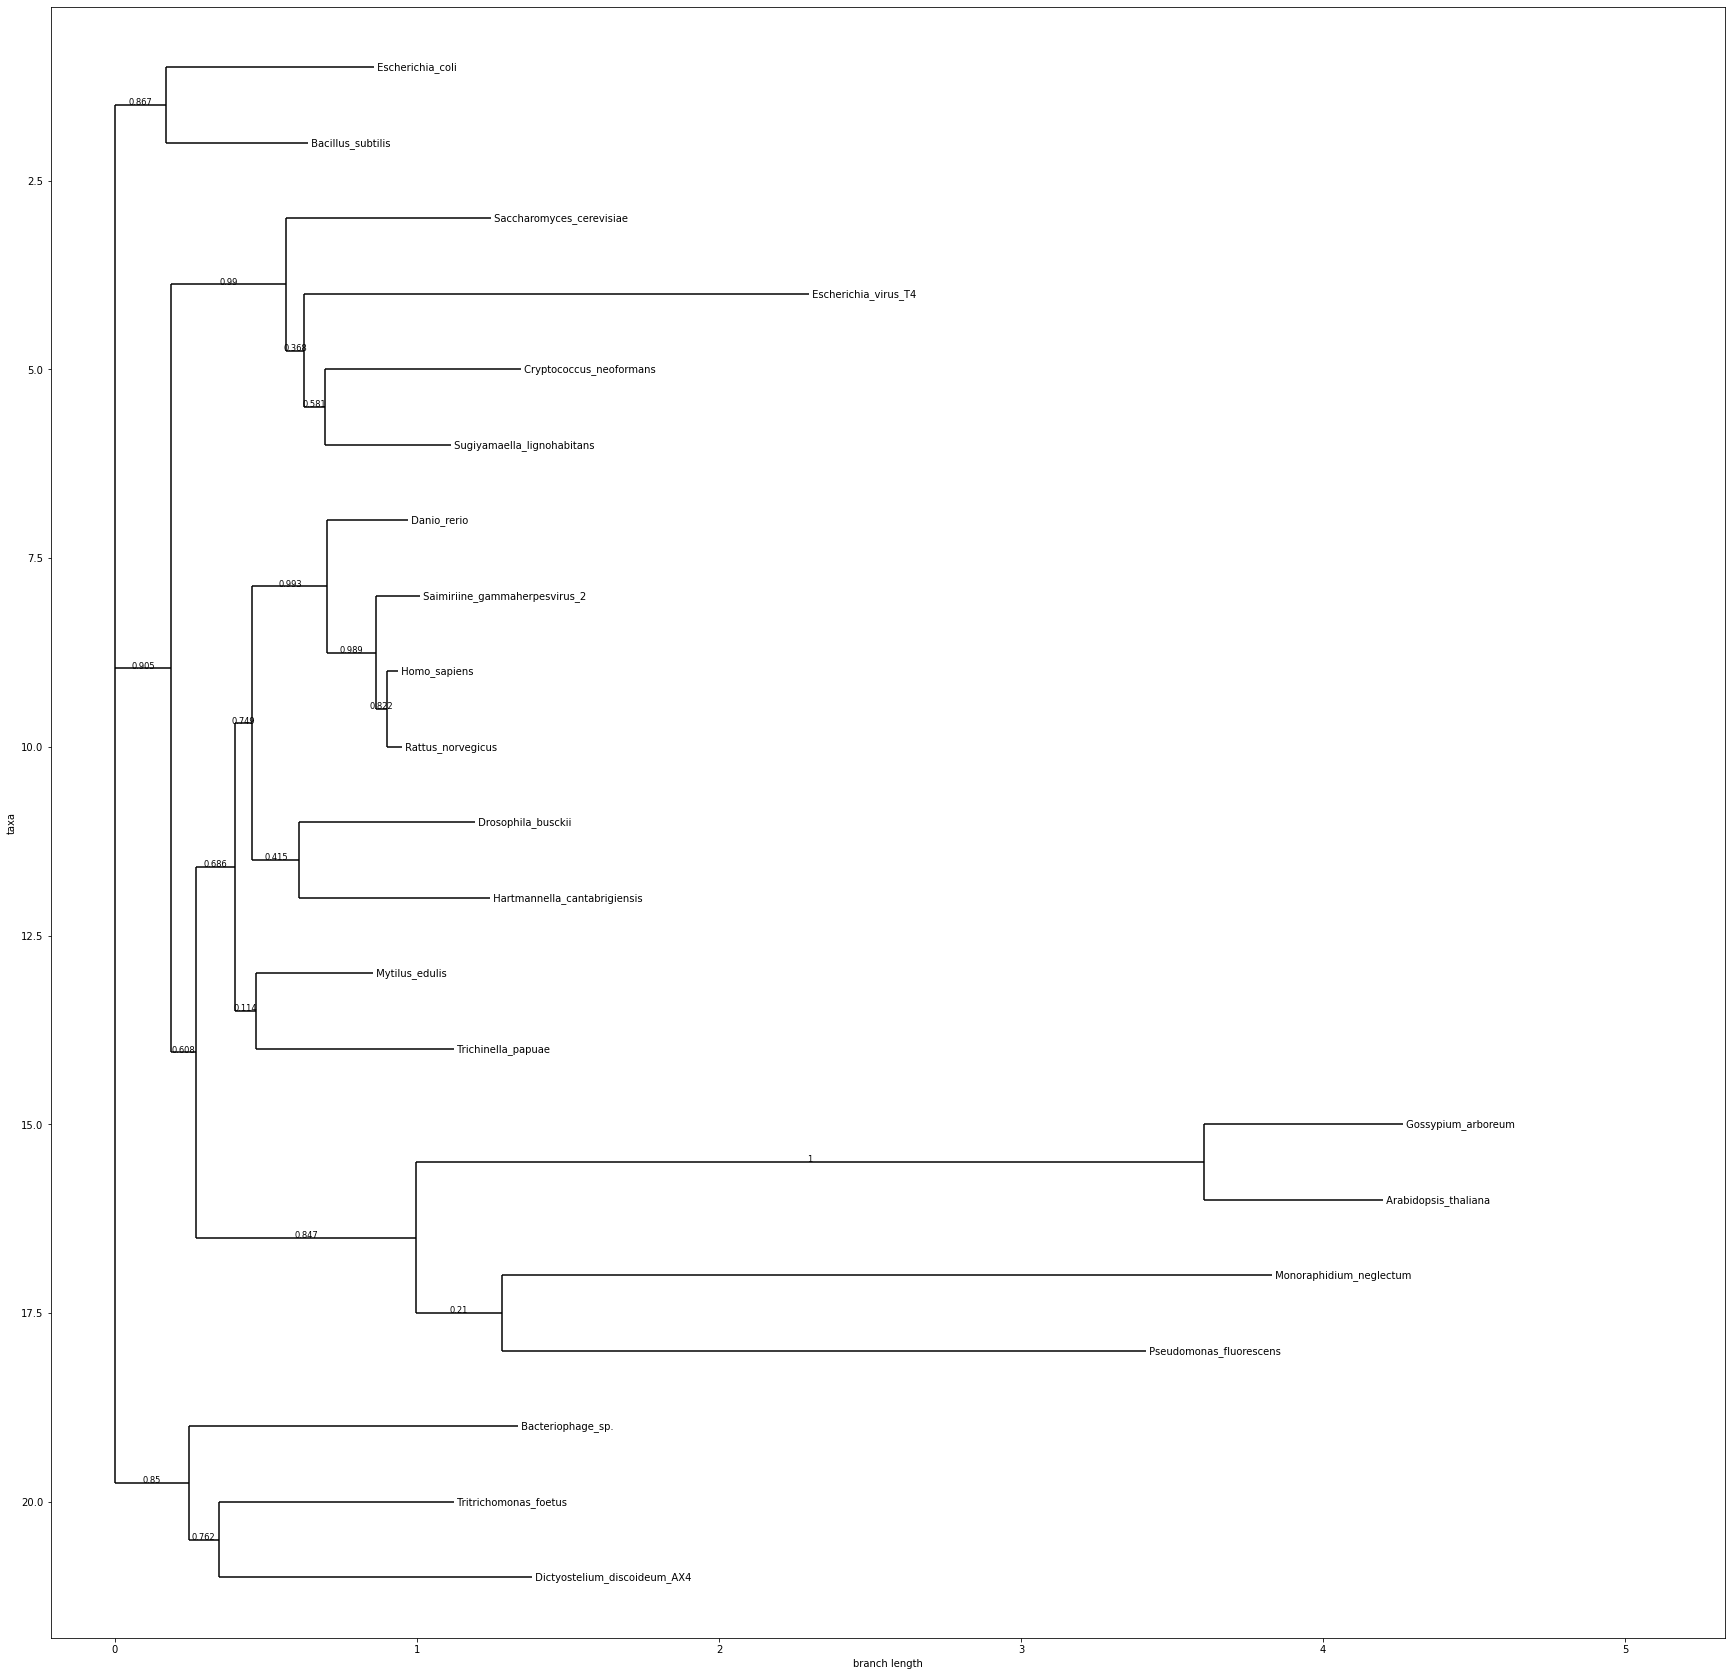

In [12]:
# Imports
from Bio import Phylo # Imports Bio.Phylo
from io import StringIO # Imports StringIO for reading strings
from matplotlib import pyplot as plt

# plotting code here
fig = plt.figure(figsize = (30, 30))
Phylo.draw(Phylo.read("dhfr_seq.nwk", "newick"), axes = fig.gca())
fig.savefig('tree.png')